# Matplotlib Pie Plots

In [3]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

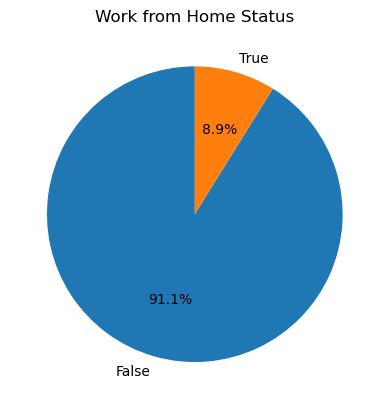

In [4]:
df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%')
plt.title('Work from Home Status')
plt.ylabel('')
plt.show()

0 job_work_from_home Work from Home
1 job_no_degree_mention Job Degree Req.
2 job_health_insurance Health Insurance Offered


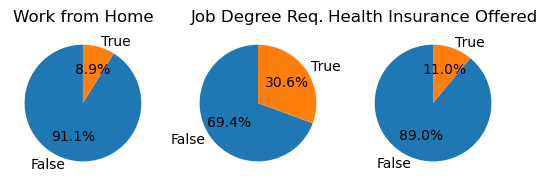

In [5]:
fig, ax = plt.subplots(1, 3)

dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered',
}
for  i, (column, title) in enumerate(dict_column.items()):
    print(i, column, title)

    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], startangle=90, autopct='%1.1f%%')
    ax[i].set_title(title)

plt.show()

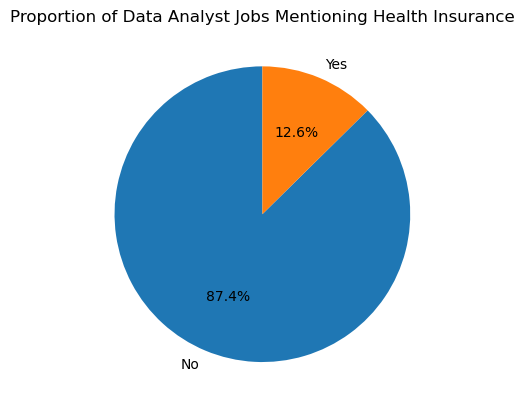

In [6]:
df_DA = df[df['job_title_short'] =='Data Analyst'].copy()

df_DA['job_health_insurance'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%', labels=['No', 'Yes'])
plt.title('Proportion of Data Analyst Jobs Mentioning Health Insurance')
plt.ylabel('')
plt.show()

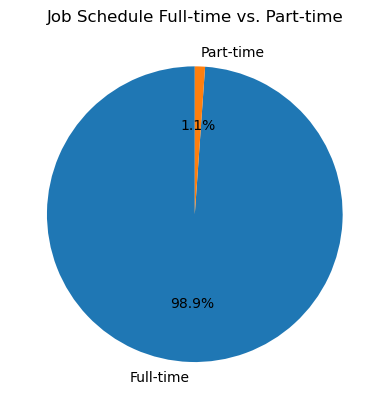

In [7]:
df_ft_pt = df[df['job_schedule_type'].isin(['Full-time', 'Part-time'])].copy()

schedule_counts = df_ft_pt['job_schedule_type'].value_counts()

plt.pie(
    schedule_counts.values,  # Values for the pie chart
    labels=schedule_counts.index,  # Labels from the index
    startangle=90,  # Rotate the chart to start at 90 degrees
    autopct='%1.1f%%'  # Display percentage values on the chart
)
plt.title('Job Schedule Full-time vs. Part-time')
plt.ylabel('')
plt.show()

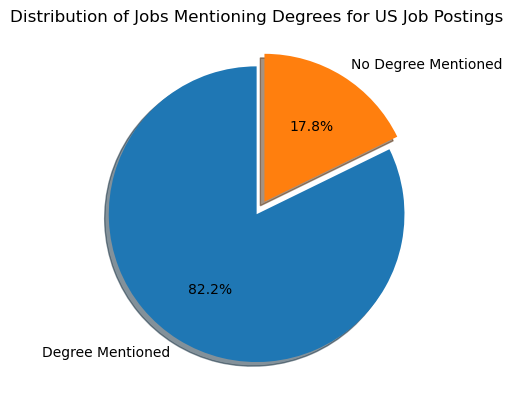

In [8]:
df_US = df[df['job_country'] == 'United States'].copy()

# Get the value counts for the 'job_no_degree_mention' column
degree_counts = df_US['job_no_degree_mention'].value_counts()

# Define explode to highlight the slice for jobs without a degree mention
explode = (0, 0.1)  # No explode for first slice, explode second slice by 0.1

# Plot the pie chart
plt.pie(
    degree_counts.values,  # Values for the pie chart
    labels =['Degree Mentioned', 'No Degree Mentioned'], 
    explode=explode,  # Explode the second slice
    startangle=90,  # Start the chart at 90 degrees
    autopct='%1.1f%%',  # Show percentages
    shadow=True  # Add shadow for better visualization
)

# Set the chart title
plt.title('Distribution of Jobs Mentioning Degrees for US Job Postings')

# Display the plot
plt.show()
